#使用matplotlib 绘制精美的图表

> matplotlib是python使用最为广泛的绘图库，这里的教程主要针对Lu论文中所使用的两大类图表，一类是是柱形图，一类是折线图

## 1.柱状图

In [1]:
## 是绘图结果在ipython notebook网页中显示，而不是打开独立的窗口
%matplotlib inline

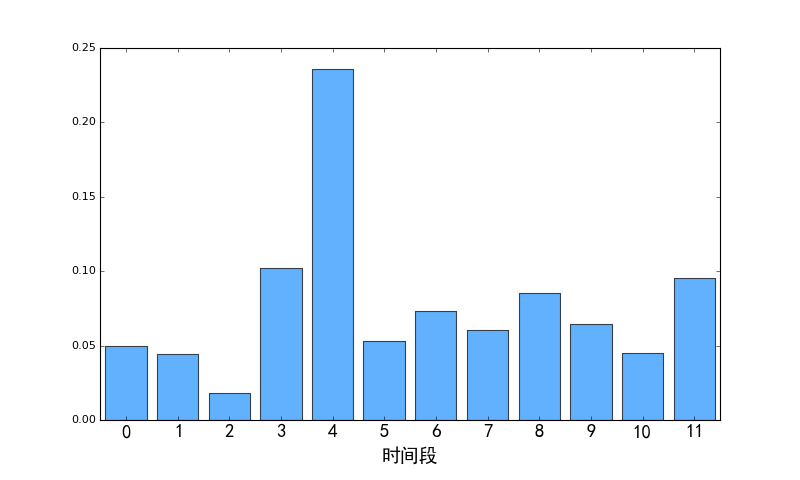

In [29]:
## 我的目的是生产一个柱形图，像下面这样的图
from IPython.display import Image
Image('importance.png')

In [26]:
## 现在准备数据
###这里是自己的数据
feature_importance =[0.049675318,0.044260025,0.018438522,0.10184021,0.235851252,0.052822766,
                    0.073514282,0.060421558,0.085140958,0.064218269,0.04505646,0.095216695]
feature_importance=np.array(feature_importance)

# 数的大小代表着柱形的高低

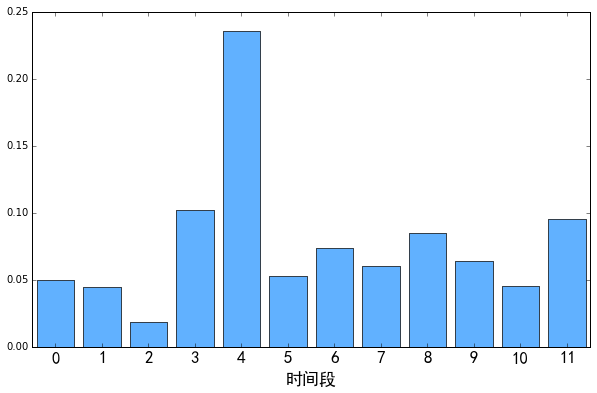

In [28]:
import matplotlib
import numpy as np
import matplotlib.pyplot as pl
    
###############################################################################

## 设置子图用以显示中文字符
myFonts=matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simhei.ttf',size=17)

## 生成要显示在柱形图下方，x坐标轴上的标记的数据，这里是1,2,3.。。
selectedFetureName=[str(i) for i in range(12)]
selectedFetureName=np.array(selectedFetureName)

## 设置柱形显示的位置
pos = np.arange(feature_importance.shape[0]) + .5
# print pos

## 设置图区域的大小
pl.figure(figsize=(10,6))
## 绘制图形，但是并不马上显示，而是进行一系列的设置之后显示
pl.bar(pos, feature_importance, align='center',
        color = 'dodgerblue',alpha=0.7) 

## 设置x坐标每个柱子下对着的字符
pl.xticks(pos, selectedFetureName,fontproperties=myFonts)

## 设置x坐标轴的名字
pl.xlabel(u'时间段',fontproperties=myFonts)

## 同样也可以设置y坐标轴的名字哦

## 可是设置图的名字，不过一般在论文中图的名字并不在图片中
# pl.title('happy')   

## 运行下面的代码会将绘图保存，dpi后面的数字代表着图片的分辨率，越大，分辨率越高，设置成200就很高了哦
pl.savefig('importance.png',dpi=80)

## 显示柱状图
pl.show()   


## 2.折线图

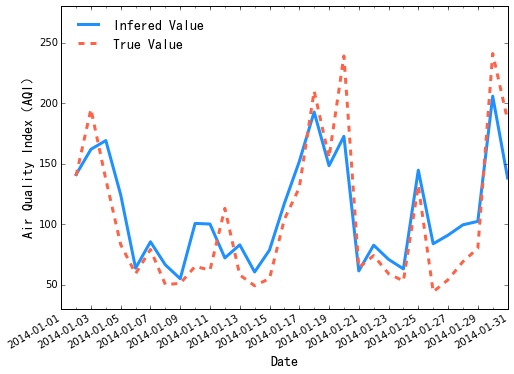

In [32]:

import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from numpy import arange
from pylab import *
from matplotlib import font_manager
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体    
mpl.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题  

date1 = datetime.datetime( 2014, 1,1)
date2 = datetime.datetime( 2014, 2, 1)
ano_data1=datetime.datetime(2014,1,4)
ano_data2=datetime.datetime(2014,1,29)
delta = datetime.timedelta(days=1)
dates = drange(date1, date2, delta)

yuce = [140.9567755,161.8410016,169.0671561,124.1812133,63.59256192,
   85.38060554,66.2796499,54.84091033,100.5580178,
   100.0616063,72.01559851,82.86171372,60.43276844,
   78.54032241,117.1404531,151.6780152,192.6726835,
   148.2830049,172.5401516,61.27984489,82.57630155,
   70.8378985,62.94671623,144.5930435,83.72872484,
   90.87926726,99.40385484,102.2463733,205.7449561,138.1208759]

turev=[140,195,137,83,59,79,50,51,65,62,113,58,49,55,104,130,210
   ,155,239,64,74,59,53,132,44,54,69,80,241,186]

###
# 224.0968737	216
# 206.9996126	200
# 245.2632999	139



wuhan_yuce=[
224.0968737,
206.9996126,
245.2632999,
172.6777264,207.9948069,239.813837,228.0041793,276.372454,
    198.0042141,194.2714792,225.4104112,229.1397868,278.0735523,
    231.5864109,218.7843477,249.5622595,287.2735573,261.7396953,
    234.3131794,78.45851204,140.2813516,104.9803694,173.3827768,
    247.7783965,326.0088644,288.8823473,253.5209723,248.420538,
    241.8349566,181.8148755]
wuhan_aqi=[
216,
200,
139,
196,254,306,248,260,163,123,210,320,268,204,166,290,
    282,273,180,97,122,133,173,298,334,263,345,337,205,236]


# f=plt.figure(figsize=(10,6))
myFonts=font_manager.FontProperties(
                fname='C:\Windows\Fonts\simhei.ttf',size=14)


fig, ax = plt.subplots(figsize=(8,6))

ax.plot_date(dates[1:], yuce,'-',label = u'Infered Value',color='dodgerblue',linewidth=3)

ax.plot_date(dates[1:], turev,'--',label = u'True Value',color='tomato',linewidth=3)

ax.legend(loc='upper left',prop=myFonts,frameon=False)

# plt.annotate('2014.1.4',
#     xy=(ano_data1, 250), arrowprops=dict(arrowstyle='->'), xytext=(ano_data1-2*delta, 270))
# plt.annotate('2014.1.29',
#     xy=(ano_data2, 250), arrowprops=dict(arrowstyle='->'), xytext=(ano_data2-2*delta, 200))

plt.xlabel(u'Date',fontproperties=myFonts)
plt.ylabel(u'Air Quality Index（AQI）',fontproperties=myFonts)

ax.set_xlim( dates[0], dates[-1] )
ax.set_ylim( 30,280)




ax.xaxis.set_major_locator( DayLocator(interval=2) )
ax.xaxis.set_minor_locator( HourLocator(arange(0,49,24)) )
ax.xaxis.set_major_formatter( DateFormatter('%Y-%m-%d') )

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
fig.autofmt_xdate()

plt.show()

